In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
 
# 合成两个音频信号
np.random.seed(0)
t = np.linspace(0, 1, 44100, False)  # 采样率为44100，时长为1秒
signal1 = np.sin(2 * np.pi * 5 * t)  # 5 Hz的正弦信号
signal2 = np.random.random(len(t))  # 随机噪音信号
 
# 线性混合信号
mixing_matrix = np.array([[1, 0.5], [0.5, 2]])
mixed_signals = np.dot(mixing_matrix, np.array([signal1, signal2])) # 第一种组合的噪声比较小，第二zhzh


### 绘制原始信号和噪声

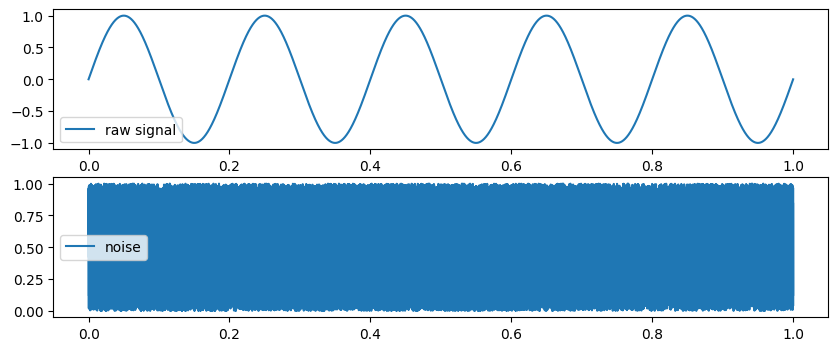

In [2]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(t,signal1,label='raw signal')
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(t,signal2,label='noise')
plt.legend(loc='best')
plt.show()

### 绘制通过两种组合方式之后的混合信号

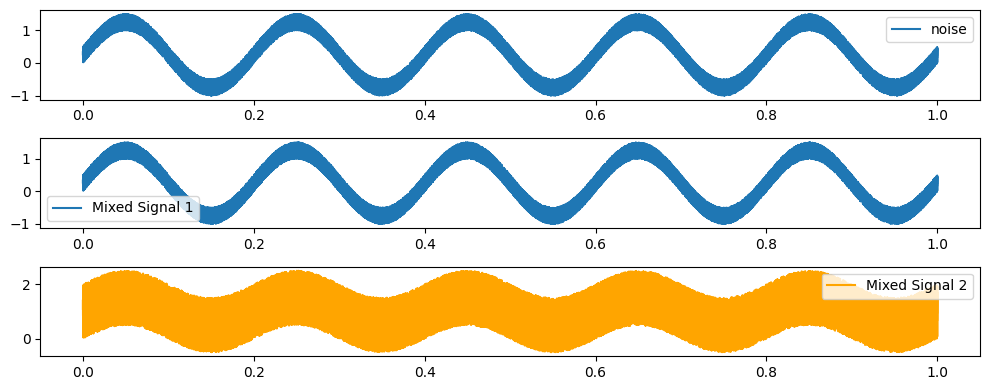

In [5]:
# 绘制混合信号
plt.figure(figsize=(10, 4))
plt.subplot(3,1,1)
plt.plot(t,mixed_signals[0],label='noise')
plt.legend(loc='best')
plt.subplot(3, 1, 2)
plt.plot(t, mixed_signals[0], label='Mixed Signal 1')
plt.legend(loc='best')
plt.subplot(3, 1, 3)
plt.plot(t, mixed_signals[1], label='Mixed Signal 2', color='orange')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 数据标准化，均值为0，方差为1

In [ ]:

from sklearn.preprocessing import StandardScaler
 
# 对数据进行标准化
scaler = StandardScaler()
scaled_mixed_signals = scaler.fit_transform(mixed_signals.T).T 

### 应用独立成分分析

In [ ]:
from sklearn.decomposition import FastICA

# 创建FastICA对象，指定分离成分的数量
n_components = 2
ica=FastICA(n_components=n_components)
ica_signals=ica.fit_transform(scaled_mixed_signals.T).T

### 绘制分离之后的信号

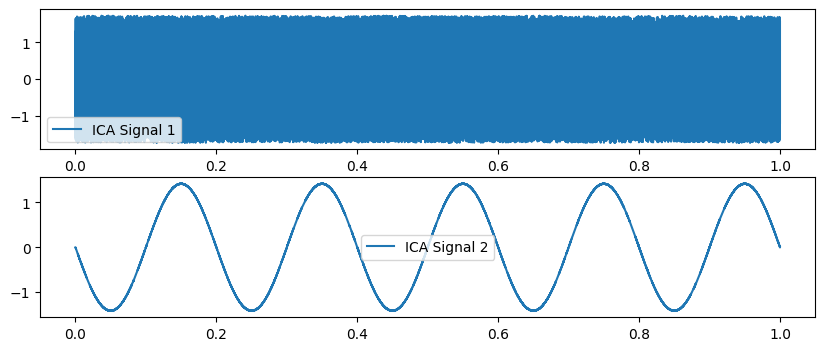

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(t,ica_signals[0],label='ICA Signal 1')
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(t,ica_signals[1],label='ICA Signal 2')
plt.legend(loc='best')
plt.show()